In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial.chebyshev import Chebyshev
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from intsam import RankApprox2dim, cheby_root_grid, GeFun

ModuleNotFoundError: No module named 'intsam'

In [3]:
def test_function(x,y):
    return 1/(1+100*(1/2 -(x**2+y**2))**2) # a
    #return 1/(1+100*(x**2+y**2)**2) # b
    #return 1/(1+1000*(((x**2-1/4)**2) *((y**2-1/4)**2))) # c
    #return np.cos(10*(x**2 +y)) + np.sin(10*(x+y**2)) # d
    #return np.tanh(10*x)*np.tanh(10*y)/np.tanh(10)**2 + np.cos(5*x) # f
    

---

In [4]:
def integrate_indef_cheb(cheb_f:Chebyshev, x_i=None):
    n = cheb_f.coef.size
    
    coef_cheby = cheb_f.coef[1:]
    c0 = cheb_f.coef[0]
    coef = 1/(2*(np.arange(n)+1))
    w1 = np.concatenate([[0], coef_cheby ])
    w2 = np.concatenate([coef_cheby[1:], [0,0]])
    cheby_coef = np.concatenate([[0], coef*(w1-w2)])
    cheby_coef[1] += c0
    
    cheb_f_int =Chebyshev(cheby_coef)
    if x_i is not None:
        cheby_coef[0] -= cheb_f_int(x_i)
    return Chebyshev(cheby_coef)

def integrate_def_cheb(cheb_f:Chebyshev, domain):
    a, b = domain
    cheb_f_inf = integrate_indef_cheb(cheb_f)
    return cheb_f_inf(b)- cheb_f_inf(a)
    
    

In [4]:
def cheby_range_transform(x, a, b): # [-1, 1] -> [a, b]
    return ((b-a)/2)*x + (b+a)/2
def cheby_range_inv_transform(x, a, b): # [a, b] -> [-1, 1]
    return (2/(b-a))*x - (b+a)/(b-a)

def cheby_ext_grid_1(a, b, n):
    x_i = np.cos((np.pi/n-1)*np.arange(n))
    return cheby_range_transform(x_i, a, b)
def cheby_root_grid_1(a, b, n): # Degree 
    x_i = np.cos((np.pi/n)*(0.5+np.arange(n)))
    return cheby_range_transform(x_i, a, b)

In [6]:
cheby_root_grid_1(-1, 1, 10)

array([ 0.98768834,  0.89100652,  0.70710678,  0.4539905 ,  0.15643447,
       -0.15643447, -0.4539905 , -0.70710678, -0.89100652, -0.98768834])

In [3]:
-1.0000
-0.9397
-0.7660
-0.5000
-0.1736
 0.1736
 0.5000
 0.7660
 0.9397
 1.0000

True

In [18]:
np.arange(n+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
n=6

In [22]:
n = 4
x_k = np.cos(np.pi/(n+1)*np.arange(n+2))
x_k

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        ])

In [16]:
np.sort(cheby_range_transform(x_k, -1, 1))

array([-0.84125353, -0.65486073, -0.41541501, -0.14231484,  0.14231484,
        0.41541501,  0.65486073,  0.84125353,  0.95949297,  1.        ])

In [ ]:
def chebpts(n, domain, pol_type = 2):
    if pol_type ==2:
        x = np.cos(np.pi/(n-1)*np.arange(n)) if n>1 else np.ones(1)
    elif pol_type ==1:
        x = np.cos((np.pi/n)*(0.5+np.arange(n)))
    return cheby_range_transform(x, domain[0], domain[1])

In [9]:
n = 10
b= 1 
a= -1
x = np.cos((np.pi/n)*(0.5+np.arange(n)))
((b-a)/2)*x + (b+a)/2

array([ 0.98768834,  0.89100652,  0.70710678,  0.4539905 ,  0.15643447,
       -0.15643447, -0.4539905 , -0.70710678, -0.89100652, -0.98768834])

In [5]:
cheb_f = Chebyshev([0,1,0.2,3,3.1])
cheb_f_int = integrate_indef_cheb(cheb_f, x_i = 5)

In [6]:
cheb_f_int.coef

array([-1.62737083e+04, -1.00000000e-01, -5.00000000e-01, -4.83333333e-01,
        3.75000000e-01,  3.10000000e-01])

In [7]:
cheb_f.coef

array([0. , 1. , 0.2, 3. , 3.1])

517495.66666666686


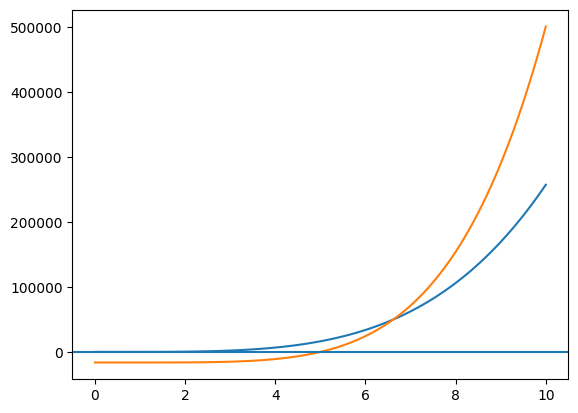

In [8]:
x = np.linspace(0, 10, 100)
y = cheb_f(x)
plt.plot(x, y)
plt.plot(x, cheb_f_int(x))
plt.axhline(0)
print(integrate_def_cheb(cheb_f, [0, 10]))

In [9]:
xdim = (-1, 1)
ydim = (-1, 1)
domain = [xdim[0], ydim[0], xdim[1], ydim[1]]
tol_err = 5E-16

In [10]:
X, Y = np.meshgrid(np.linspace(*xdim , 500), np.linspace(*ydim , 500))

In [11]:
f_approx= RankApprox2dim.from_function_approx(
    test_function, domain, tol_err = tol_err, initial_step=1, max_step =6,
    include_boundary=False,
    show_process=True,
    hold_pivot = True)


In [13]:
Z2 = f_approx(X,Y)

In [14]:
ma = Z2.max()
mi = Z2.min()
level_n = 10
level = np.linspace(mi, ma , level_n, endpoint=True)

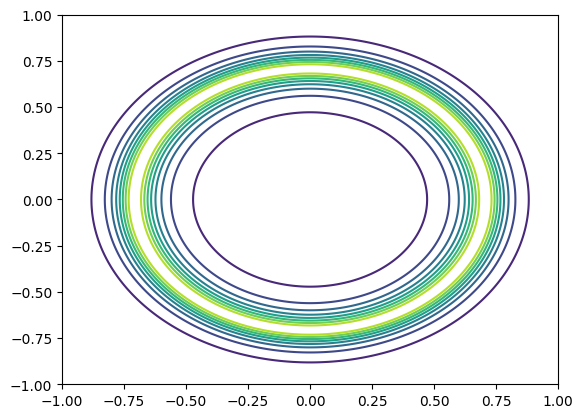

In [16]:
plt.contour(X,Y, Z2, level)
#x, y = f_approx.add_info["pivots"].T
#plt.scatter(x, y, c="r")

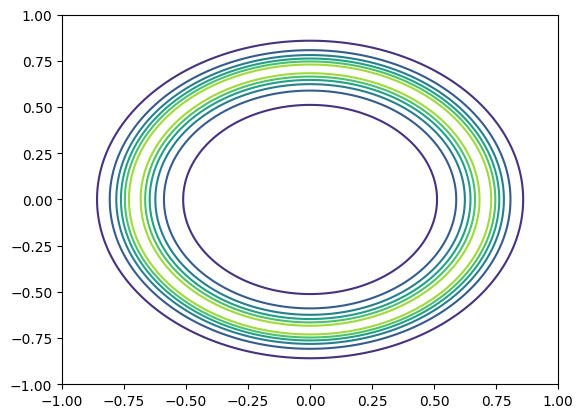

In [17]:
Z = test_function(X,Y)
plt.contour(X,Y,Z)
#plt.scatter(x, y, c="r")

1.55955248715145e-11


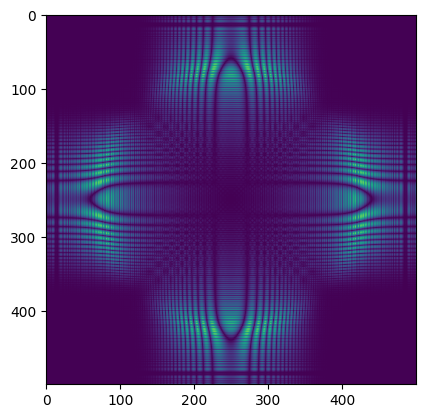

In [18]:
plt.imshow(np.sqrt((Z-Z2)**2))
print(np.sqrt((Z-Z2)**2).max())

In [19]:
np.sqrt((Z-Z2)**2).max()

1.55955248715145e-11

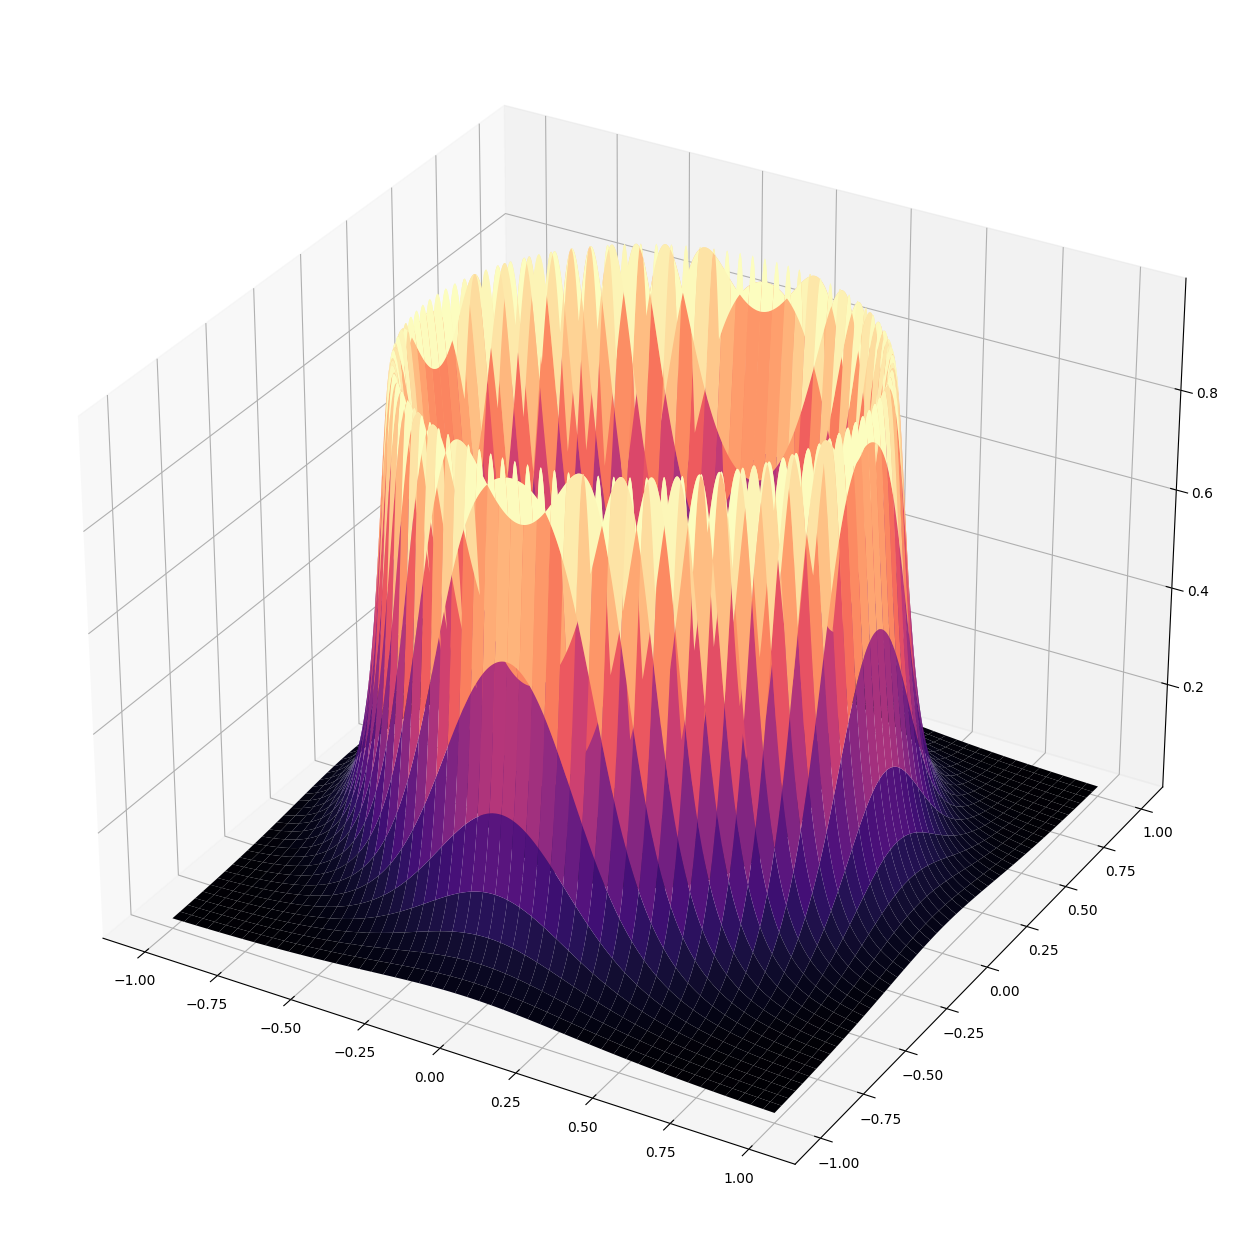

In [20]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y , Z2, cmap="magma")
plt.show()

In [11]:
%%timeit
np.einsum("ji,jk,ki->i",fy_v, weight, fx_v).reshape(shape)

54.2 µs ± 242 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
np.diag((fy_v.T@(weight@fx_v))).reshape(shape)

127 ms ± 729 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

In [21]:
import numpy as np
from functools import partial

from typing import Callable, Union, Tuple
from numpy.typing import NDArray
from numbers import Number
from collections.abc import Iterable

from convolution import convolve2d
from numpy.polynomial.chebyshev import Chebyshev

from matplotlib import pyplot as plt


from intsam import RankApprox2dim, cheby_root_grid, GeFun, Cheby_stage_params

def test_function(x,y):
    return 1/(1+100*(1/2 -(x**2+y**2))**2) # a
    #return 1/(1+100*(x**2+y**2)**2) # b
    #return 1/(1+100}0*(((x**2-1/4)**2) *((y**2-1/4)**2))) # c
    #return np.cos(10*(x**2 +y)) + np.sin(10*(x+y**2)) # d
    #return np.tanh(10*x)*np.tanh(10*y)/np.tanh(10)**2 + np.cos(5*x) # f
    

In [22]:
class GeApprox:
    def __init__(self, func_x=None, func_y=None, weights=None):
        self.func_x = [func_x] if func_x is not None else None
        self.func_y = [func_y] if func_y is not None else None
        if func_x is not None:
            n = len(self.func_x)
            self.weights = np.array(weights).reshape(n, n) if weights is not None else None
        else:
            self.weights = np.array([[weights]])    
    def __str__(self):
        return f"""sum_i sum_j w_ij u_i(x) v_j(y)
        {self.func_y}
        {self.weights}
        {self.func_x}"""   
    def __call__(self, x, y):
        if self.func_x is None:
            return 0
        
        if not isinstance(x, np.ndarray):
            f_x_v = np.fromiter((f(x) for f in self.func_x), dtype=np.dtype(float))
            f_y_v = np.fromiter((f(y) for f in self.func_y), dtype=np.dtype(float))
            return np.einsum("i,ij,j", f_y_v, self.weights, f_x_v)
        
        # 2 dim mesh
        shape = x.shape
        if len(shape) != 1: 
            x = x.reshape(-1)
            y = y.reshape(-1)
        if len(x) != len(y):
            raise ValueError("x, y values must have same dimension.")
        fx_v = np.vstack(f(x) for f in self.func_x)
        fy_v = np.vstack(f(y) for f in self.func_y)

        try:
            result = np.einsum("ji,jk,ki->i",fy_v, self.weights, fx_v).reshape(shape)
        except:
            print(fy_v.shape, self.weights.shape, fx_v.shape)
            raise ValueError(" See above message")
            
        return result
    def add_term(self, func_x, func_y, weights):
        if self.func_x is None:
            # scalar case
            self.func_x = [func_x]
            self.func_y = [func_y]
            self.weights = np.array([[weights]]) if  not isinstance(weights, np.ndarray) else weights 
            return 0
        if isinstance(func_x, Callable):
            weights_pre = np.pad(self.weights, ((0,1),(0,1)), mode="constant", constant_values=(0,0))
            if not isinstance(weights, np.ndarray) and isinstance( weights, Number):
                n = self.func_x.size
                weights_ = np.zeros((n+1, n+1))
                weights_[n,n] = weights
                weights = weights_
            if weights_pre.shape != weights.shape:
                raise ValueError("Invaild weights dimension, must be a (n+1) square matrix.")
            self.weights = weights_pre + weights
            self.func_x.append(func_x)
            self.func_y.append(func_y)
            return 0
        
        raise NotImplementedError("Not implemented")
    @property
    def rank(self):
        return len(self.func_x)
class GeFun(GeApprox):
    def __init__(self, func:Callable, func_x=None, func_y=None, weights=None):
        super().__init__(func_x, func_y, weights)
        self.func = func
        self.points = None
        self.mode = True
    def __call__(self, x,y):
        r1 = super().__call__(x,y)
        r2 = self.func(x,y) if self.mode else 0
        return r1 + r2
    def add_point(self, point, neg = False):
        x_k, y_k = point

        denominator = self(x_k, y_k) 
        denominator = - denominator if neg else denominator


        if self.points is not None:

            u_k_x_val = np.fromiter((u(x_k) for u in self.func_x), dtype=np.dtype(float))
            v_k_y_val = np.fromiter((v(y_k) for v in self.func_y), dtype=np.dtype(float))

            w_x = np.concatenate([self.weights @ u_k_x_val, np.ones(1)])
            w_y = np.concatenate([v_k_y_val @ self.weights, np.ones(1)])

            weights_W = convolve2d(w_x.reshape(1, -1).T, w_y.reshape(1, -1))/denominator

        else:
            self.points = np.array([point])
            weights_W = np.array([[1/denominator]])

        u_x = partial(self.func, y=y_k)
        v_y = partial(self.func, x_k)

        self.points = np.concatenate([self.points, [point]])
        self.add_term(u_x, v_y, weights = weights_W)
    def get_approximation(self):
        func = GeApprox()
        func.func_x = self.func_x
        func.func_y = self.func_y
        func.weights = -self.weights
        return func
        

In [23]:
func_test =GeApprox()
func_test.func_x = [lambda x:x, lambda x: np.cos(x), lambda x: np.exp(-(x**2)/100)]
func_test.func_y = [lambda y:y, lambda y: np.sin(y), lambda y: np.tanh(-(y**2)/100)]
weights = np.array([
    [2, 0,0.2],
    [3, 3, 0],
    [1, 0.2,1]
])
func_test.weights = weights

In [24]:
def t_func(x,y):
    a = 2*y*x
    b = 0.2 * y * np.exp(- (x**2)/100)
    c = 3 * np.sin(y) * x  
    d = 3 * np.cos(x) * np.sin(y)
    e = np.tanh(-(y**2)/100) * x
    f = 0.2 * np.cos(x) * np.tanh(-(y**2)/100)
    g = np.exp(-(x**2)/100) * np.tanh(-(y**2)/100)
    return a+ b+ c+ d+ e+ f+ g

In [25]:
np.abs(t_func(X,Y) - func_test(X,Y)).max()

1.7763568394002505e-15

In [26]:
"""4 x y    + 2 x**2 y
+  4 x y**2 + 3 x**2 y**2"""

'4 x y    + 2 x**2 y\n+  4 x y**2 + 3 x**2 y**2'

In [27]:
def vailidation(x,y):
    return 4*x*y + 4 *x* (y**2) + 2 * (x**2) *y + 3*(x**2)*y**2

In [28]:
vailidation(1,2)

40

In [39]:
from IPython.display import display, clear_output

In [29]:
xdim = (-1, 1)
ydim = (-1, 1)
domain = [xdim[0], ydim[0], xdim[1], ydim[1]]
tol_err = 5E-16
x_i, x_f = y_i, y_f = -1, 1

#X, Y = np.meshgrid(np.linspace(*xdim , 500), np.linspace(*ydim , 500))

In [30]:
j = 5
n, max_step_stage_1 = Cheby_stage_params(j)
arr_x = cheby_root_grid(x_i, x_f, n)
arr_y = cheby_root_grid(y_i, y_f, n)
print(f"Step: {j}, Sample Dim: {n}\n Max iteration:{max_step_stage_1}")
print("Float")
ge_e_k = GeFun(test_function)
p_x, p_y = np.meshgrid(arr_x, arr_y)
_, c_l = p_x.shape

for k in range(0, max_step_stage_1):

    e_k_val = np.abs(ge_e_k(p_x, p_y))
    err_val = e_k_val.max()
    if err_val < tol_err:
        break
    
    max_index = np.argmax(e_k_val)
    r = int(max_index/c_l)
    c = max_index%c_l
    x_k, y_k = p_x[r, c], p_y[r, c]

    
    ge_e_k.add_point((x_k, y_k), neg=True)
    print(100*" ",end="\r")
    print("Rank:", k+1, "Err:", err_val, end='\r')

Step: 5, Sample Dim: 257
 Max iteration:65
Float


In [36]:
f_pa = ge_e_k.get_approximation()

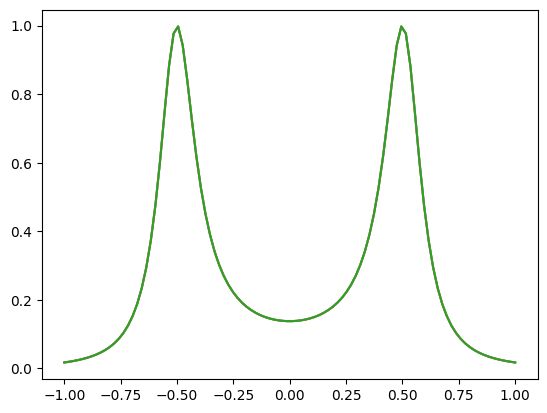

In [45]:
x_lim = np.linspace(-1,1,100)
y = 0.5*np.ones(x_lim.shape)
plt.plot(x_lim, f_pa(x_lim, y))
plt.plot(x_lim, f_approx(x_lim, y))
plt.plot(x_lim, test_function(x_lim, y))

In [48]:
test_function(0.5, 0.1)

0.14792899408284024

In [49]:
err_val

9.885973739631737e-08

In [50]:
x2,y2 =ge_e_k.points.T

In [51]:
Z2.shape

(500, 500)

In [52]:
test_function(X,Y).shape

(500, 500)

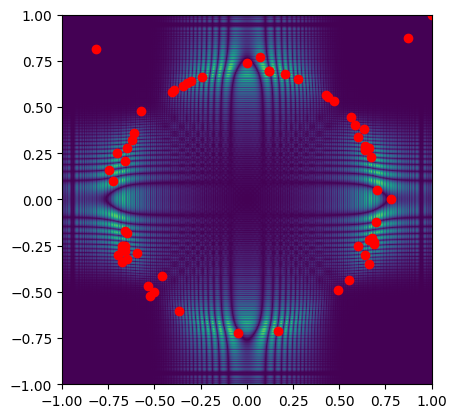

In [53]:
#plt.imshow(ge_e_k(X,Y), extent=[-1, 1, -1, 1])
plt.imshow(np.abs(test_function(X,Y) - Z2), extent = [-1, 1, -1, 1])
plt.scatter(x2, y2, c="r")
#print(np.abs(ge_e_k(X,Y)).max())
#print(err)
#plt.scatter(x, y, c = "g")

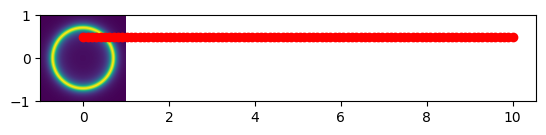

In [54]:
plt.imshow(test_function(X,Y)-ge_e_k(X,Y),  extent=[-1, 1, -1, 1])
plt.scatter(x, y, c="r")

1.6690271098518394e-07


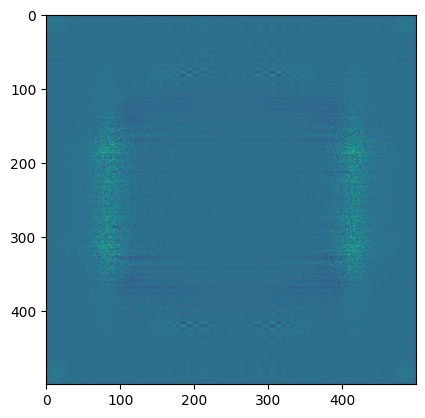

In [55]:
Z = f_approx(X,Y)- (test_function(X,Y) - ge_e_k(X,Y))
print(Z.max())
plt.imshow(Z)

In [56]:
x = p_x.reshape(-1)
y = p_y.reshape(-1)
fx_v = np.vstack(f(x) for f in ge_e_k.fun_x)
fy_v = np.vstack(f(y) for f in ge_e_k.fun_y)


AttributeError: 'GeFun' object has no attribute 'fun_x'

In [ ]:
p_cor = (x_k, y_k)
denominator  = ge_e_k(x_k, y_k)

In [ ]:
func_x_v = np.fromiter((u(x_k) for u in ge_e_k.fun_x), dtype = np.dtype(float))
func_y_v = np.fromiter((v(y_k) for v in ge_e_k.fun_y), dtype= np.dtype(float))
                
wy = (func_y_v@ge_e_k.weights).reshape(-1)
wx = (ge_e_k.weights@func_x_v).reshape(-1)

In [26]:
print(wx, "\n", wy)

[-1.] 
 [-0.24210468]


In [27]:
wy = np.concatenate([wy, np.ones(1)])
wx = np.concatenate([wx, np.ones(1)])

In [28]:
print(wx, "\n", wy)

[-1.  1.] 
 [-0.24210468  1.        ]


In [22]:
wy

array([-0.24210468,  1.        ])

In [23]:
wx

array([-1.,  1.])

In [34]:
wy.reshape(1,-1).T,

(array([[-0.24210468],
        [ 1.        ]]),)

In [31]:
convolve2d(wy.reshape(1,-1).T, wx.reshape(1,-1))

array([[ 0.24210468, -0.24210468],
       [-1.        ,  1.        ]])

In [32]:
wy.reshape(1,-1)

array([[-0.24210468,  1.        ]])

In [36]:
w = np.array([[2]])
np.pad(w, ((0,1), (0,1)), mode="constant", constant_values=(0,0))


array([[2, 0],
       [0, 0]])

In [171]:
a = np.array([[1,2]])
b = np.array([[,]])

SyntaxError: invalid syntax (213269332.py, line 2)

In [170]:
b.shape

(1, 0)